In [1]:
import numpy as np
import neural_net
import scipy.stats
import matplotlib.pyplot as plt

In [2]:
def call(K, T):
    S=1
    vol = 0.2
    r=0
    d1 = (np.log(S/K) + (r + vol**2/2)*T)/(vol*np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)
    return 1*(-K*np.exp(-r*T)*scipy.stats.norm.cdf(d2) + S*scipy.stats.norm.cdf(d1))
f = neural_net.Fn([0.5,0.1],[2,5], call)

In [3]:
training, validation, test = neural_net.load_data(1000,500,500,f)

0.16655687029902194 0.29989980333272026
Epoch 5672 training complete. learning_halve = 3
Epoch 11120 training complete. learning_halve = 2
Epoch 16233 training complete. learning_halve = 1
Epoch 21749 training complete. learning_halve = 1
Epoch 27321 training complete. learning_halve = 1
Epoch 32848 training complete. learning_halve = 1
Epoch 38393 training complete. learning_halve = 1
Epoch 43885 training complete. learning_halve = 1
Epoch 49377 training complete. learning_halve = 1
Epoch 54782 training complete. learning_halve = 1
Epoch 60333 training complete. learning_halve = 1
Epoch 65889 training complete. learning_halve = 1
Epoch 71443 training complete. learning_halve = 1
Epoch 77053 training complete. learning_halve = 1
Epoch 82596 training complete. learning_halve = 1
Epoch 88171 training complete. learning_halve = 1
Epoch 93750 training complete. learning_halve = 1
Epoch 99282 training complete. learning_halve = 1
Epoch 104863 training complete. learning_halve = 1
Epoch 1104

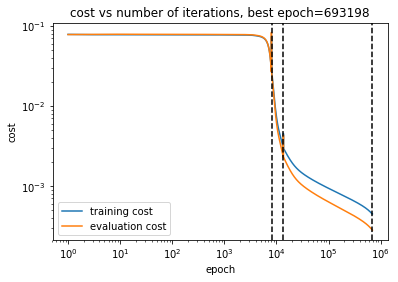

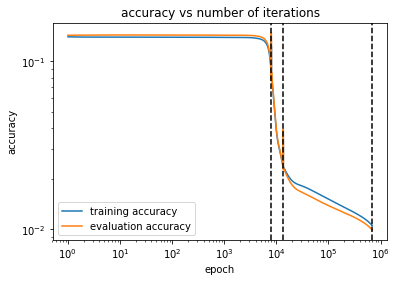

In [5]:
size = [2,10,5,1]
activation_type = ["Sigmoid", "Sigmoid", "Exponential"]
net = neural_net.Network(size, activations=activation_type, Fn=f, cost=neural_net.ExponentialCost)
eta = 0.5
batch_size = len(training[0])
print(net.accuracy(test), net.accuracy(test, flag="Max"))
net.SGD(training, batch_size, eta, mu=0.0, 
         variable_learning=True, evaluation_data=validation, learning_halve=3,
       monitor_evaluation_cost=True, monitor_training_accuracy=True, monitor_evaluation_accuracy=True)

In [6]:
print(net.accuracy(training), net.accuracy(training, flag="Max"))
print(net.accuracy(test), net.accuracy(test, flag="Max"))

0.01049489125324816 0.07628477225263619
0.010765289498701789 0.04725739544835161
